In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [94]:
#made by yours truly, Mohamed Ehab

In [2]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

In [4]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df = df.drop(columns=["customer_id"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [15]:
print(df.isnull().sum())
print("\nduplicated: ",df.duplicated().sum())

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

duplicated:  0


In [20]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [21]:
df['products_number'].unique()

array([1, 3, 2, 4], dtype=int64)

In [26]:
df = pd.get_dummies(df, drop_first=True)

In [41]:
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  int64  
 3   balance           10000 non-null  float64
 4   products_number   10000 non-null  int64  
 5   credit_card       10000 non-null  int64  
 6   active_member     10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   churn             10000 non-null  int64  
 9   country_Germany   10000 non-null  bool   
 10  country_Spain     10000 non-null  bool   
 11  gender_Male       10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


<Axes: ylabel='Frequency'>

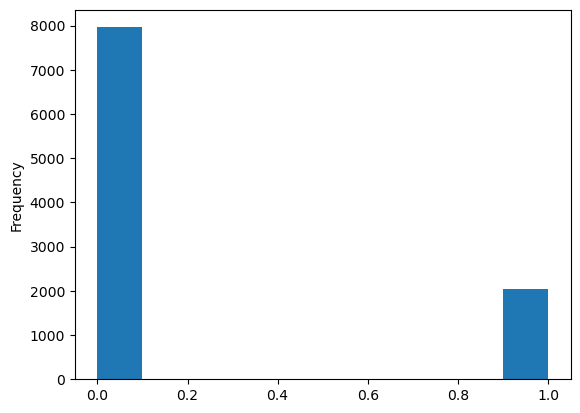

In [32]:
df.churn.plot.hist()

In [37]:
loyal = (df.churn==0).sum()
churned = (df.churn==1).sum()
print(f"{loyal} is still bank customers\n{churned} has left the bank.")

7963 is still bank customers
2037 has left the bank.


In [56]:
X = df.drop(columns='churn')
y = df['churn']

<Axes: title={'center': 'correlation with churn customers'}>

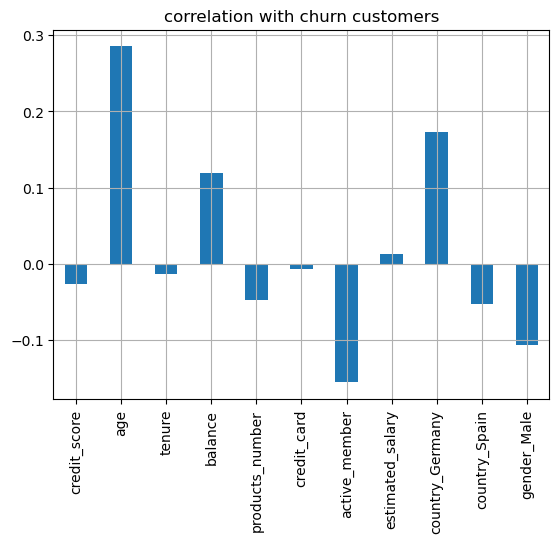

In [57]:
X.corrwith(df['churn']).plot.bar(title='correlation with churn customers', grid=True)

<Axes: >

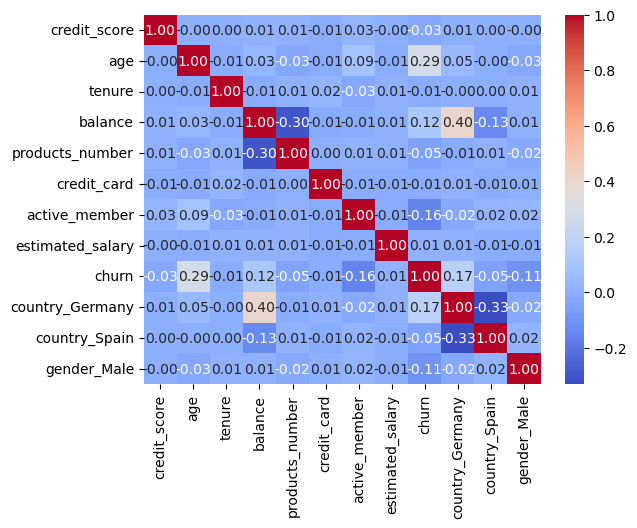

In [51]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f')

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [73]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 80.15%


<Axes: >

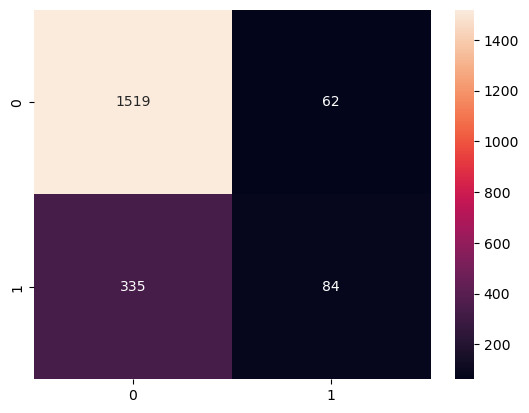

In [93]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')

In [83]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.88      1581
           1       0.58      0.20      0.30       419

    accuracy                           0.80      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.77      0.80      0.76      2000

